In [209]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
# 한글폰트 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')  # 나눔바른고딕 폰트 설정

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [212]:
case = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Case.csv')
patientinfo = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/PatientInfo.csv')
patientroute = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/PatientRoute.csv')
time = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Time.csv')
timeage = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/TimeAge.csv')
timegender = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/TimeGender.csv')
timeprovince = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/TimeProvince.csv')
region = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Region.csv')
weather = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Weather.csv')
searchtrend = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/SearchTrend.csv')
seoulfloating = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/SeoulFloating.csv')
policy = pd.read_csv('/content/gdrive/MyDrive/Aiffel/FLP/DataAnalysis/corona19/data/Policy.csv')

# 0. 들어가며
- 금번 과제는 데이터를 활용한 EDA를 통해 코로나 관련 인사이트를 도출하기 보다는  우리가 실제 미디어를 통해 접할 수 있었던 내용들을 __기술통계로 분석하고, 전처리를 통해 올바르게 시각화하여 구현할 수 있는지__에 대해 집중한 점 참고 바랍니다.

# 1. Table Information [[link]](https://colab.research.google.com/drive/1DoH8KZUk8vIh4EMZsGfl7ZYo1BJoN8mO#scrollTo=KV3vzbiZOpRk)

### 1) 테이블 정보 요약

### 2) 테이블별 컬럼 정보

# 2. EDA

## 2-1. 기술 통계

### 1) CASE (확진 케이스)

In [213]:
print('Case 크기: ', case.shape)
case.head()

Case 크기:  (112, 8)


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [214]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         112 non-null    int64 
 1   province        112 non-null    object
 2   city            112 non-null    object
 3   group           112 non-null    bool  
 4   infection_case  112 non-null    object
 5   confirmed       112 non-null    int64 
 6   latitude        112 non-null    object
 7   longitude       112 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 6.4+ KB


In [215]:
case.describe()

,case_id,confirmed
count,1.120000e+02,112.000000
mean,3.040183e+06,87.937500
std,2.052266e+06,440.500949
min,1.000001e+06,0.000000
25%,1.200009e+06,5.000000
50%,2.000002e+06,10.000000
75%,5.100002e+06,33.000000
max,7.000003e+06,4510.000000


4510명의 확진자를 발생시킨 case_id가 있다.

In [216]:
case.describe(include=object)

,province,city,infection_case,latitude,longitude
count,112,112,112,112,112
unique,17,34,43,41,41
top,Gyeongsangbuk-do,-,etc,-,-
freq,12,50,17,72,72


In [217]:
# 결측치 확인
case.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

Null값은 없다고 나오지만 city, latitude, longitude 컬럼에 - 값으로 존재한다고 볼 수 있다.  
이는 해당 province 전체의 해외유입, 확진자 접촉, 기타 등의 전체 sum 값이라 어떻게 처리하면 좋을지 고민이 필요하다.

### 02. Patient Info (환자정보)

In [218]:
print('Patient Info 크기: ', patientinfo.shape)
patientinfo.head()

Patient Info 크기:  (3388, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [219]:
patientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   sex                 3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

In [220]:
patientinfo.describe()

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,3.388000e+03,2276.000000,2927.000000,31.000000,8.220000e+02,643.000000
mean,3.498439e+09,6737.086555,1975.068329,2.387097,2.667213e+09,18.129082
std,2.201996e+09,3333.136141,20.275295,1.453213,1.741377e+09,73.730420
min,1.000000e+09,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1.300000e+09,4270.000000,1961.000000,1.000000,1.200000e+09,2.000000
50%,2.000001e+09,7933.000000,1975.000000,2.000000,2.000000e+09,4.000000
75%,6.001001e+09,9516.750000,1993.000000,3.000000,4.100000e+09,13.000000
max,7.000000e+09,10758.000000,2020.000000,6.000000,7.000000e+09,1160.000000


- 최고령 확진자는 1916년생, 최연소 확진자는 2020년생(신생아)이다.
- 접촉자수가 1,160명인 case가 눈에 띈다.

In [221]:
patientinfo[patientinfo['contact_number'] == 1160.0]  # 31번 확진자 from 신천지(aka.슈퍼 전파자)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
767,1200000031,31.0,female,1959.0,60s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,1160.0,NaN,2020-02-18,NaN,NaN,isolated


In [222]:
patientinfo.describe(include=object)

,sex,age,country,province,city,disease,infection_case,symptom_onset_date,confirmed_date,released_date,deceased_date,state
count,3311,3304,3388,3388,3309,18,2620,481,3385,1327,62,3388
unique,2,11,12,17,154,1,23,73,87,76,35,3
top,female,20s,Korea,Gyeongsangbuk-do,Gyeongsan-si,True,contact with patient,2020-02-27,2020-03-05,2020-03-20,2020-03-04,released
freq,1856,802,3361,1230,632,18,968,29,145,71,4,1886


- 남성 보다 여성 확진자 수가 더 많다.
- 연령대로는 20대 확진자 수가 가장 많다.

In [223]:
# 성별 확진자 수 비교
patientinfo.groupby(['sex'])['patient_id'].count()

sex
female    1856
male      1455
Name: patient_id, dtype: int64

In [224]:
# 연령별 확진자 수 비교
patientinfo.groupby(['age'])['patient_id'].count()

age
0s       55
100s      1
10s     150
20s     802
30s     438
40s     455
50s     597
60s     401
70s     204
80s     156
90s      45
Name: patient_id, dtype: int64

In [225]:
# 결측치 확인
patientinfo.isnull().sum()

patient_id               0
global_num            1112
sex                     77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

- __Observation__
  - birth_year(출생연도)는 결측치가 많기 때문에 유사한 age(연령대) 정보를 사용하는 것이 적합할 것 같다.
  - infection_order(N차 감염), contact_number(접촉자수), infected_by(해당 환자를 감염시킨 사람의 환자 ID), symptom_onset_date(증상발현일)  같이 결측치가 많은 데이터는 활용하기가 어려워 보인다.   
  (질병 발생 초반 역학조사 단계 정도에서만 유의미한 데이터로 생각된다.)
  - __disease=Ture 인 사람과 아닌 사람의 입원기간, 사망율 등을 eda__

### 03. Patient Route (환자동선)

In [226]:
print('Patient Route 크기: ', patientroute.shape)
patientroute.head()

Patient Route 크기:  (6714, 8)


,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [227]:
patientroute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  6714 non-null   int64  
 1   global_num  3571 non-null   float64
 2   date        6714 non-null   object 
 3   province    6714 non-null   object 
 4   city        6714 non-null   object 
 5   type        6714 non-null   object 
 6   latitude    6714 non-null   float64
 7   longitude   6714 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 419.8+ KB


In [228]:
patientroute.describe(include=object)

,date,province,city,type
count,6714,6714,6714,6714
unique,99,16,153,24
top,2020-02-24,Seoul,Cheonan-si,etc
freq,327,2629,470,2049


In [229]:
# 결측치 확인
patientroute.isnull().sum()

patient_id       0
global_num    3143
date             0
province         0
city             0
type             0
latitude         0
longitude        0
dtype: int64

- __Observation__
  - 환자 이동동선 중 어떤 방문장소가 많은가? (병원??)
  - 환자별 이동동선(위도,경도) 거리를 계산해서 어떤 환자가 가장 이동거리가 많았는지, 다시 말해 전국적 확산에 영향을 미칠 수 있었던 환자가 누구인지 예측
  - 필수/불필요한 장소 방문을 구분할 수 있는가 -> 연령대와 연결

### 04. Time (시간)

In [230]:
print('Time 크기: ', time.shape)
time.head()

Time 크기:  (102, 7)


,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [231]:
time.tail()

,date,time,test,negative,confirmed,released,deceased
97,2020-04-26,0,598285,578558,10728,8717,242
98,2020-04-27,0,601660,582027,10738,8764,243
99,2020-04-28,0,608514,588559,10752,8854,244
100,2020-04-29,0,614197,595129,10761,8922,246
101,2020-04-30,0,619881,600482,10765,9059,247


In [232]:
# 최초 확진자 발생일
time[time['confirmed'] == 1]

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0


In [233]:
# 확진자 최초 퇴원일
time[time['released'] == 1]

,date,time,test,negative,confirmed,released,deceased
16,2020-02-05,16,714,522,18,1,0


In [234]:
# 최초 사망자 발생일
time[time['deceased'] == 1]

,date,time,test,negative,confirmed,released,deceased
31,2020-02-20,16,13202,11238,104,16,1


In [235]:
time.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

In [236]:
# 일자별 검사자수/확진자수/완치자수(퇴원)/사망자수

- __Observation__
  - 3.1부 시간 기준이 16시에서 00시로 변경 되었으나, 일자별 데이터이기 때문에 time 컬럼 자체는 불필요해 drop 해도 무방할 것 같다. 
  - 2020년 2월 5일에 최초 퇴원자가 나왔으며, 2020년 2월 20일에 최초 사망자가 발생하였다.
  - 전처리를 통해 일자별 검사자수/검사결과 등을 확인 해볼 수 있다.

### 05. Time Age (연령대별 확진/사망자수 추이)

In [237]:
print('Time Age 크기: ', timeage.shape)
timeage.head()

Time Age 크기:  (540, 5)


,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [238]:
timeage.tail(9)

,date,time,age,confirmed,deceased
531,2020-04-30,0,0s,140,0
532,2020-04-30,0,10s,590,0
533,2020-04-30,0,20s,2952,0
534,2020-04-30,0,30s,1158,2
535,2020-04-30,0,40s,1427,3
536,2020-04-30,0,50s,1956,15
537,2020-04-30,0,60s,1348,35
538,2020-04-30,0,70s,709,74
539,2020-04-30,0,80s,485,118


- 확진자 수는 20대에서 가장 많이 발생하였으며, 사망자 수는 80대에서 가장 많이 나왔다.
- 연령대가 올라갈 수록 치명률(사망자/확진자)이 높아지는 것을 알 수 있다.

In [239]:
timeage.isnull().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

### 06. Time Gender (성별 확진/사망자수 추이)



In [240]:
print('Time Province 크기: ', timegender.shape)
timegender.head()

Time Province 크기:  (120, 5)


,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [241]:
timegender.tail()

,date,time,sex,confirmed,deceased
115,2020-04-28,0,female,6408,116
116,2020-04-29,0,male,4348,129
117,2020-04-29,0,female,6413,117
118,2020-04-30,0,male,4352,130
119,2020-04-30,0,female,6413,117


- 누적 데이터이므로 데이터의 처음과 끝 부분을 모두 확인해준다.
- 누적 확진자 수는 남성보다 여성이 많으며, 사망자 수는 여성보다 남성이 많은 것을 확인할 수 있다.

In [242]:
timegender.isnull().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

### 07. Time Province (지역별 확진/퇴원/사망자수 추이)

In [243]:
print('Time Province 크기: ', timeprovince.shape)
timeprovince.head()

Time Province 크기:  (1734, 6)


,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [244]:
timeprovince.tail(17)

,date,time,province,confirmed,released,deceased
1717,2020-04-30,0,Seoul,633,453,2
1718,2020-04-30,0,Busan,137,116,3
1719,2020-04-30,0,Daegu,6852,6144,172
1720,2020-04-30,0,Incheon,93,68,0
1721,2020-04-30,0,Gwangju,30,27,0
1722,2020-04-30,0,Daejeon,40,35,0
1723,2020-04-30,0,Ulsan,43,37,1
1724,2020-04-30,0,Sejong,46,38,0
1725,2020-04-30,0,Gyeonggi-do,676,486,15
1726,2020-04-30,0,Gangwon-do,53,40,2


In [245]:
timeprovince.isnull().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

### 08. Region (지역정보)

In [246]:
print('Region 크기: ', region.shape)
region.head()

Region 크기:  (244, 12)


,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [247]:
region.tail()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245
243,80000,Korea,Korea,37.566953,126.977977,6087,8837,340,1.56,15.67,7.2,94865


- 데이터 마지막에 누계값이 포함되어 있습니다.

In [248]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


In [249]:
region.describe()  # 데이터 마지막에 누계 값이 포함되어 있어 max 값은 아마도 누계 값일 것 입니다.

,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32912.090164,36.396996,127.661401,74.180328,107.901639,4.151639,1.294754,20.923730,10.644672,1159.258197
std,19373.349736,1.060304,0.904781,402.713482,588.788320,22.513041,0.592898,8.087428,5.604886,6384.185085
min,10000.000000,33.488936,126.263554,4.000000,4.000000,0.000000,0.190000,7.690000,3.300000,11.000000
25%,14027.500000,35.405263,126.927663,14.750000,16.000000,0.000000,0.870000,14.117500,6.100000,111.000000
50%,30075.000000,36.386601,127.384250,22.000000,31.000000,1.000000,1.270000,18.530000,8.750000,300.000000
75%,51062.500000,37.466119,128.473953,36.250000,55.250000,3.000000,1.612500,27.262500,14.625000,694.500000
max,80000.000000,38.380571,130.905883,6087.000000,8837.000000,340.000000,4.180000,40.260000,24.700000,94865.000000


In [250]:
region.isnull().sum()

code                        0
province                    0
city                        0
latitude                    0
longitude                   0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

### 09. Weather (날씨 정보)

In [251]:
print('Weather 크기: ', weather.shape)
weather.head()

Weather 크기:  (25295, 10)


,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


- 날씨 데이터가 2016년 1월 1일부터 존재한다.

In [252]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25295 entries, 0 to 25294
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   25295 non-null  int64  
 1   province               25295 non-null  object 
 2   date                   25295 non-null  object 
 3   avg_temp               25280 non-null  float64
 4   min_temp               25290 non-null  float64
 5   max_temp               25292 non-null  float64
 6   precipitation          25295 non-null  float64
 7   max_wind_speed         25286 non-null  float64
 8   most_wind_direction    25266 non-null  float64
 9   avg_relative_humidity  25275 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.9+ MB


In [253]:
weather.describe()

,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
count,25295.00000,25280.000000,25290.00000,25292.000000,25295.000000,25286.000000,25266.00000,25275.000000
mean,32124.64914,13.604964,9.41193,18.518306,3.253742,5.116590,196.16639,65.453598
std,20313.51486,9.588969,9.97471,9.641624,12.605453,2.028242,106.76164,17.254674
min,10000.00000,-14.800000,-19.20000,-11.900000,0.000000,1.000000,20.00000,10.400000
25%,13500.00000,5.700000,1.10000,10.600000,0.000000,3.800000,90.00000,53.300000
50%,20000.00000,14.000000,9.30000,19.300000,0.000000,4.700000,230.00000,66.600000
75%,50500.00000,21.900000,18.00000,26.600000,0.200000,6.000000,290.00000,78.500000
max,70000.00000,33.900000,30.30000,40.000000,310.000000,29.400000,360.00000,100.000000


In [254]:
# 결측치 확인
weather.isnull().sum()

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

- 전체 데이터 크기 대비 결측치의 개수가 많지 않아 각 지역별 평균 값으로 대체해줘도 무방할 것 같다.


### 10. Search Trend (검색 트렌드)

In [255]:
print('Search Trend 크기: ', searchtrend.shape)
searchtrend.head()

Search Trend 크기:  (1581, 5)


,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [256]:
searchtrend.tail()

,date,cold,flu,pneumonia,coronavirus
1576,2020-04-25,0.12781,0.02709,0.08672,4.13405
1577,2020-04-26,0.13363,0.03263,0.08136,3.95342
1578,2020-04-27,0.11226,0.04427,0.10390,4.11033
1579,2020-04-28,0.11481,0.03981,0.10336,3.73088
1580,2020-04-29,0.10781,0.04163,0.09136,3.78952


In [257]:
searchtrend.describe()

,cold,flu,pneumonia,coronavirus
count,1581.000000,1581.000000,1581.000000,1581.000000
mean,0.193522,0.252883,0.225827,1.796793
std,0.468075,0.775704,0.471297,9.203093
min,0.051630,0.009810,0.068810,0.001540
25%,0.107080,0.044540,0.131350,0.006270
50%,0.134630,0.104260,0.166990,0.008630
75%,0.166990,0.258710,0.211630,0.012450
max,15.720710,27.327270,11.393200,100.000000


In [258]:
# 감기 검색량이 최고치를 찍은 날짜
searchtrend[searchtrend['cold'] == searchtrend['cold'].max()]

,date,cold,flu,pneumonia,coronavirus
1165,2019-03-11,15.72071,0.15381,0.16272,0.00836


In [259]:
# 독감 검색량이 최고치를 찍은 날짜
searchtrend[searchtrend['flu'] == searchtrend['flu'].max()]

,date,cold,flu,pneumonia,coronavirus
354,2016-12-20,0.37553,27.32727,0.3278,0.02436


In [260]:
# 폐렴 검색량이 최고치를 찍은 날짜
searchtrend[searchtrend['pneumonia'] == searchtrend['pneumonia'].max()]

,date,cold,flu,pneumonia,coronavirus
1468,2020-01-08,0.1949,0.81824,11.3932,0.02636


In [261]:
# 코로나19 검색량이 최고치를 찍은 날짜
searchtrend[searchtrend['coronavirus'] == searchtrend['coronavirus'].max()]

,date,cold,flu,pneumonia,coronavirus
1483,2020-01-23,0.30308,0.55625,3.18035,100.0


In [262]:
searchtrend.isnull().sum()

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

### 11. Seoul Floating

In [263]:
print('Seoul Floating 크기: ', seoulfloating.shape)
seoulfloating.head()

Seoul Floating 크기:  (432000, 7)


,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [264]:
seoulfloating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432000 entries, 0 to 431999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        432000 non-null  object
 1   hour        432000 non-null  int64 
 2   birth_year  432000 non-null  int64 
 3   sex         432000 non-null  object
 4   province    432000 non-null  object
 5   city        432000 non-null  object
 6   fp_num      432000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 23.1+ MB


In [265]:
seoulfloating.describe()

,hour,birth_year,fp_num
count,432000.000000,432000.000000,432000.000000
mean,11.500000,45.000000,27860.034884
std,6.922195,17.078271,13122.838441
min,0.000000,20.000000,4480.000000
25%,5.750000,30.000000,18940.000000
50%,11.500000,45.000000,25690.000000
75%,17.250000,60.000000,34000.000000
max,23.000000,70.000000,127640.000000


In [266]:
seoulfloating[seoulfloating['fp_num'] == seoulfloating['fp_num'].max()]

,date,hour,birth_year,sex,province,city,fp_num
246712,2020-02-04,14,30,female,Seoul,Gangnam-gu,127640


In [267]:
seoulfloating.describe(include=object)

,date,sex,province,city
count,432000,432000,432000,432000
unique,60,2,1,25
top,2020-01-09,male,Seoul,Seodaemun-gu
freq,7200,216000,432000,17280


In [268]:
seoulfloating.isnull().sum()

date          0
hour          0
birth_year    0
sex           0
province      0
city          0
fp_num        0
dtype: int64

### 12. Policy
- 48개의 코로나 관련 정부 정책 정보이다.

In [269]:
print('Policy 크기: ', policy.shape)
policy.head()

Policy 크기:  (48, 7)


,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [270]:
policy.describe(include=object)

,country,type,gov_policy,detail,start_date,end_date
count,48,48,48,46,48,10
unique,1,6,17,44,26,7
top,Korea,Immigration,Special Immigration Procedure,from all the countries,2020-03-15,2020-04-06
freq,48,15,13,2,5,4


In [271]:
policy.isnull().sum()

policy_id      0
country        0
type           0
gov_policy     0
detail         2
start_date     0
end_date      38
dtype: int64

## 2-2. 데이터 전처리

### 01. Case

In [272]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [273]:
# 확진자 수 집계
print('확진자 수 : ', case['confirmed'].sum(), '명')

확진자 수 :  9849 명


In [274]:
# 그룹별 확진자 수, 비율
case_group = case.groupby('group')['confirmed'].sum().to_frame().sort_values(by='confirmed', ascending=False)
case_group['ratio'] = case.groupby('group')['confirmed'].sum() / case['confirmed'].sum()
case_group

,confirmed,ratio
group,,
True,6792,0.689613
False,3057,0.310387


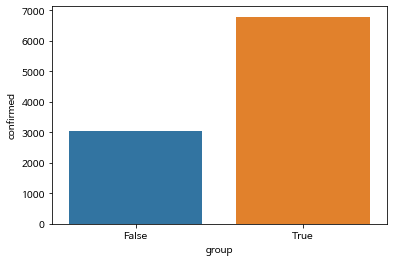

In [275]:
# 그룹별 확진자 수, 비율 시각화
case_group = case.groupby('group', as_index=False)['confirmed'].sum()
sns.barplot(x='group', y='confirmed', data=case_group)
plt.show()

In [276]:
# 집단감염인 경우(True)의 감염루트
case_group_t = case[case['group'] == True]
case_group_t = case_group_t.groupby('infection_case')['confirmed'].sum().to_frame().sort_values(by='confirmed', ascending=False)
case_group_t['ratio'] = case_group_t.groupby('infection_case')['confirmed'].sum() / case_group_t['confirmed'].sum()
case_group_t.head()

,confirmed,ratio
infection_case,,
Shincheonji Church,5212,0.767373
Second Mi-Ju Hospital,196,0.028857
Guro-gu Call Center,166,0.024441
Hansarang Convalescent Hospital,128,0.018846
Cheongdo Daenam Hospital,123,0.018110


- 집단감염 발생 확진자가 가장 많은 곳은 5,212명(약 77%)이 확진을 받은 대구 신천지 교회이다

In [277]:
# 신천지 교회 확진자는 대구에만 존재할까?
case[case['infection_case'] == 'Shincheonji Church']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
7,1000008,Seoul,from other city,True,Shincheonji Church,8,-,-
12,1100002,Busan,from other city,True,Shincheonji Church,12,-,-
20,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510,35.84008,128.5667
29,1300001,Gwangju,from other city,True,Shincheonji Church,9,-,-
34,1400002,Incheon,from other city,True,Shincheonji Church,2,-,-
39,1500002,Daejeon,from other city,True,Shincheonji Church,2,-,-
44,1600001,Ulsan,from other city,True,Shincheonji Church,16,-,-
50,1700003,Sejong,from other city,True,Shincheonji Church,1,-,-
57,2000004,Gyeonggi-do,from other city,True,Shincheonji Church,29,-,-
63,3000001,Gangwon-do,from other city,True,Shincheonji Church,17,-,-


- 대구/경북 지역뿐만 아니라 전국에 신천지 교회 발 확진자가 존재한다.
- 이는 신천지 교회 성도가 전국에 퍼져 있다는 의미이며, 이 확진자들이 각 지역에 코로나를 전파 시켰을 가능성을 배제할 수 없다.

In [278]:
# 집단감염이 아닌 경우(False)의 감염루트
case_group_f = case[case['group'] == False]
case_group_f = case_group_f.groupby('infection_case')['confirmed'].sum().to_frame().sort_values(by='confirmed', ascending=False)
case_group_f['ratio'] = case_group_f.groupby('infection_case')['confirmed'].sum() / case_group_f['confirmed'].sum()
case_group_f

,confirmed,ratio
infection_case,,
contact with patient,1250,0.408898
etc,1030,0.336932
overseas inflow,777,0.254171


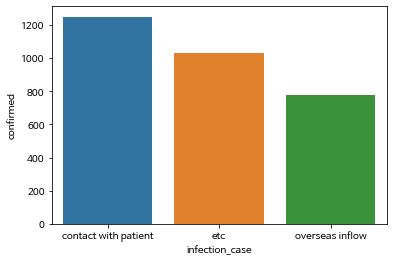

In [279]:
# 집단감염이 아닌 경우(False)의 감염루트 시각화
case_group_f = case[case['group'] == False]
case_group_f = case_group_f.groupby('infection_case', as_index=False)['confirmed'].sum().sort_values(by='confirmed', ascending=False)
sns.barplot(x='infection_case', y='confirmed', data=case_group_f)
plt.show()

- 집단감염이 아닌 경우의 확진자 수는 __환자 접촉으로 인한 감염 > 기타 > 해외 유입 순__ 이었다.
- __기타__의 경우 현재 데이터만 가지고 확인할 수 없으나 아마도 __확진 경로를 확인 할 수 없는 경우__일 것으로 추측된다.

__향후 과제__
- 집단감염 장소를 교회/학교/병원/요양원 등으로 전처리하여 그룹화 해보기

### 02. Patient Info

In [280]:
print('집단감염 경로 수 : ', len(patientinfo['infection_case'].unique()))
patientinfo['infection_case'].unique()

집단감염 경로 수 :  24


array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten', nan,
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Gyeongsan Seorin Nursing Home',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Milal Shelter', 'Geochang Church',
       'Changnyeong Coin Karaoke'], dtype=object)

- 집단감염 장소의 종류가 세분화 되어있기 때문에, 집단감염의 경우 하나의 그룹('group')으로 묶어줄 필요가 있을 것 같습니다.

In [281]:
patientinfo['infection_case'].isna().sum()

768

- 감염장소를 확인할 수 없는 NaN 값 768명이 있는데 이는 감염경로을 알 수 없는 경우 이므로, 기타('etc') 그룹으로 간주합니다.

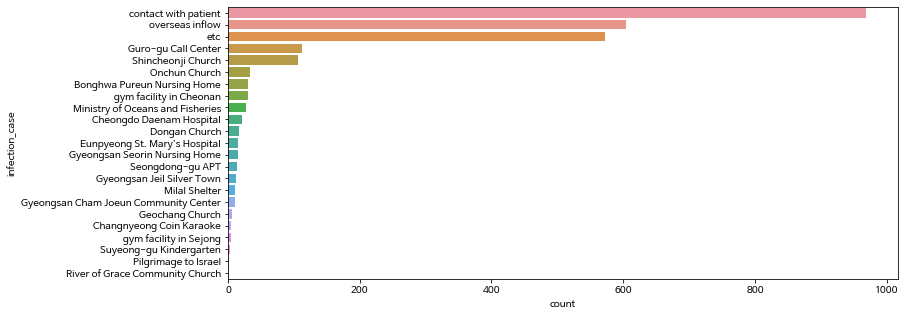

In [282]:
infection_place = patientinfo.groupby(['infection_case'], as_index=False)['patient_id'].count()
infection_place.rename(columns={'patient_id':'count'}, inplace=True)  # 컬럼 이름 변경
infection_place = infection_place.sort_values(by='count', ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x='count', y='infection_case', data=infection_place)
plt.show()

- 위에서 봤던 'case' 테이블 데이터와 달리 신천지 교회 확진자 수 정보가 대부분 제외 되어 있습니다. 때문에 감염장소 외 다른 데이터를 사용하는 것은 적합하지 않아 보입니다.
- 확진자 수 1~3위는 위에서 확인했던 것처럼 집단감염이 아닌 case 입니다.
- 감염장소별 확진자 수가 5명 이상인 곳만 '집단감염'으로 간주하고 나머지 데이터는 사용하지 않겠습니다.
- 결론적으로 감염경로를 총 4개의 그룹, __확집자 접촉('contact with patient'), 해외유입('overseas inflow'), 집단감염('group'), 알수 없음('etc')__로 분류합니다.

In [283]:
def classification(x):
    if x == 'overseas inflow':
        y = 'overseas'
    elif x == 'contact with patient':
        y = 'individual'
    elif (x == 'etc') | (pd.isna(x)):
        y = 'unknown'
    else:
        y = 'group'
    return y

patientinfo['infection'] = patientinfo['infection_case'].apply(lambda x: classification(x))
print(patientinfo['infection'].unique())
patientinfo.head()

['overseas' 'individual' 'group' 'unknown']


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,overseas
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,overseas
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,individual
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,overseas
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,individual


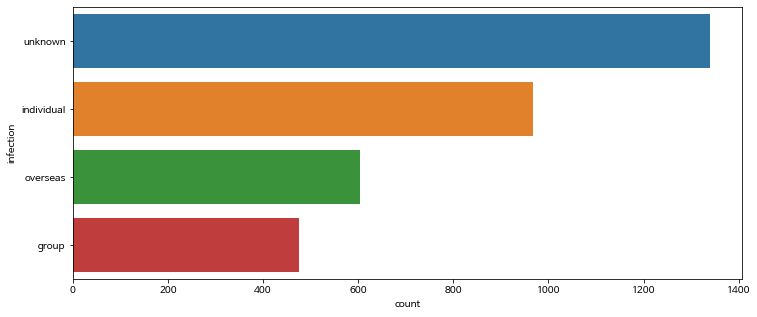

In [284]:
g = patientinfo.groupby(['infection'], as_index=False)['patient_id'].count()
g.rename(columns={'patient_id':'count'}, inplace=True)  # 컬럼 이름 변경
g = g.sort_values(by='count', ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x='count', y='infection', data=g)
plt.show()

- 감염경로를 전처리한 결과 __'알 수 없음 > 확진자 접촉 > 해외유입 > 집단 감염' 순__으로 나타남을 확인할 수 있다. 하지만 '알 수 없음'의 경우 역학조사를 통해 진짜 감염경로를 확인할 수 없었던 것인지, 아니면 정확한 역학 조사가 이루어지지 않았던 것인지가 확인할 수 없었다.

Text(0.5, 1.0, 'Confirmed cases')

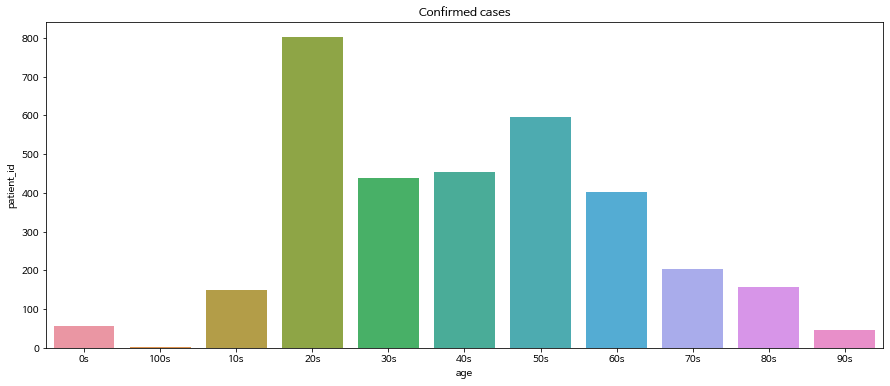

In [285]:
# 연령대별 확진자 수 시각화
f,ax = plt.subplots(1,1, figsize=(15,6))
g = patientinfo.groupby(['age'], as_index=False)['patient_id'].count()
sns.barplot(x='age', y='patient_id', data=g)
ax.set_title('Confirmed cases')

- 연령대별 확진자 수는 __20대 > 50대 > 40대 순__으로 발생하였다고 나타난다.

In [286]:
# 연령대별 감염 장소
pd.crosstab(patientinfo.infection_case, patientinfo.age, margins=True)

age,0s,100s,10s,20s,30s,40s,50s,60s,70s,80s,90s,All
infection_case,,,,,,,,,,,,
Bonghwa Pureun Nursing Home,0,0,0,0,1,1,6,8,2,9,4,31
Changnyeong Coin Karaoke,0,0,1,2,0,0,0,1,0,0,0,4
Cheongdo Daenam Hospital,0,0,0,1,2,4,6,8,0,0,0,21
Dongan Church,0,0,1,8,2,0,3,2,1,0,0,17
Eunpyeong St. Mary's Hospital,0,0,0,2,1,1,1,7,2,2,0,16
Geochang Church,0,0,0,0,0,1,2,3,0,0,0,6
Guro-gu Call Center,2,0,2,13,15,34,36,8,1,1,0,112
Gyeongsan Cham Joeun Community Center,0,0,0,0,0,0,1,1,2,3,3,10
Gyeongsan Jeil Silver Town,0,0,0,0,0,2,0,0,3,5,2,12


- 해당 기간 전체 감염자수의 50% 수준을 차지 하는 대구 신천지 교회 관련 확진자들의 데이터가 부족하다.

In [287]:
# 연령대별 입원기간(퇴원일-확진일), 생존기간(사망일-확진일) 시각화

# 데이터 타입 변환(문자열->날짜)
patientinfo['confirmed_date'] = pd.to_datetime(patientinfo['confirmed_date'], format='%Y-%m-%d')
patientinfo['released_date'] = pd.to_datetime(patientinfo['released_date'], format='%Y-%m-%d')
patientinfo['deceased_date'] = pd.to_datetime(patientinfo['deceased_date'], format='%Y-%m-%d')

# 기간 계산(퇴원일-확진일, 사망일-확진일)
patientinfo['released_days'] = patientinfo['released_date'] - patientinfo['confirmed_date']
patientinfo['deceased_days'] = patientinfo['deceased_date'] - patientinfo['confirmed_date']

# 데이터 타입 변환(날짜->숫자)
patientinfo['released_days'] = patientinfo['released_days'].dt.days
patientinfo['deceased_days'] = patientinfo['deceased_days'].dt.days

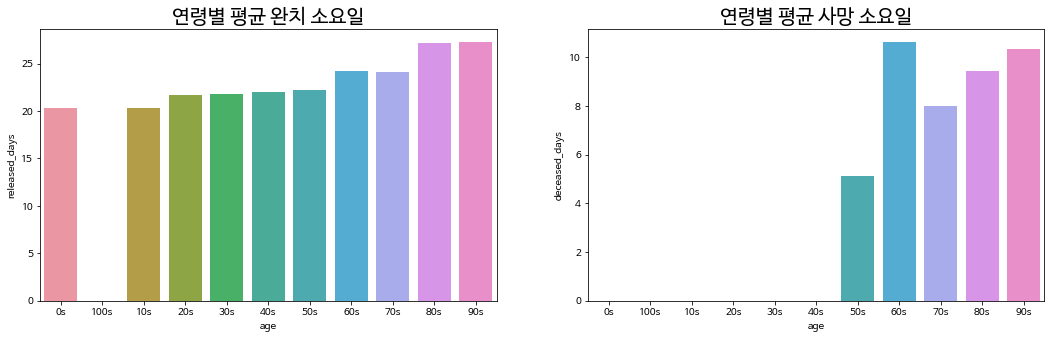

In [288]:
f,ax = plt.subplots(1,2, figsize=(18,5))
released_days = patientinfo.groupby(['age'], as_index=False)['released_days'].mean().fillna(0)
ax[0].set_title('연령별 평균 완치 소요일', fontsize=20)
sns.barplot(x='age', y='released_days', data=released_days, ax=ax[0])
deceased_days = patientinfo.groupby(['age'], as_index=False)['deceased_days'].mean().fillna(0)
ax[1].set_title('연령별 평균 사망 소요일', fontsize=20)
sns.barplot(x='age', y='deceased_days', data=deceased_days, ax=ax[1])

- 연령별 평균 완치 소요일은 고령층이 상대적으로 완치 소요기간이 조금 더 소요되는 것으로 확인된다.
- 연령별 평균 사망 소요일은 표본이 많지 않아 유의미한 특징이 있다고 보기 어려울 것 같다.

(array([737439., 737456., 737470., 737485., 737499., 737516., 737530.,
        737546.]), <a list of 8 Text major ticklabel objects>)

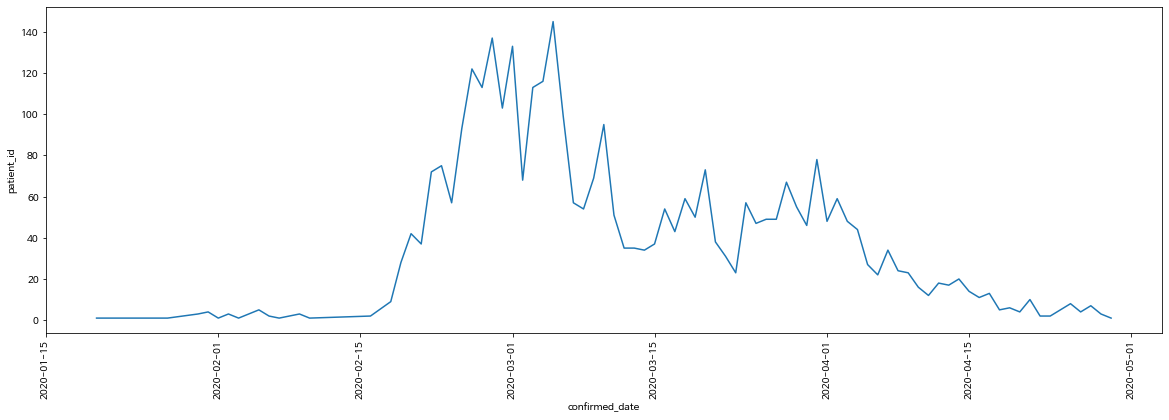

In [289]:
# 일자별 확진자수 추이
plt.figure(figsize=(20,6))
g = patientinfo.groupby(['confirmed_date'], as_index=False)['patient_id'].count()
sns.lineplot(x='confirmed_date', y='patient_id', data=g)
plt.xticks(rotation=90)

- 2월 말 ~ 3월 초 대구 신천지 교회 집단 감염 이후 확진자 수 가 점차 감소하는 것을 확인할 수 있다.

### 03. Patient Route

In [290]:
patientroute.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [291]:
print('방문장소 종류: ', len(patientroute['type'].unique()))
patientroute['type'].unique()

방문장소 종류:  24


array(['airport', 'hospital', 'etc', 'store', 'public_transportation',
       'restaurant', 'church', 'beauty_salon', 'pharmacy', 'pc_cafe',
       'bank', 'cafe', 'bakery', 'bar', 'gym', 'school',
       'real_estate_agency', 'karaoke', 'post_office', 'gas_station',
       'lodging', 'academy', 'university', 'administrative_area_level_1'],
      dtype=object)

In [292]:
# 감염자들은 어디에서 왔는가
patientroute.groupby(['type'])['patient_id'].count()

type
academy                          11
administrative_area_level_1      14
airport                         237
bakery                           26
bank                             32
bar                              13
beauty_salon                     19
cafe                            102
church                          148
etc                            2049
gas_station                      12
gym                              20
hospital                       1927
karaoke                          10
lodging                          45
pc_cafe                          80
pharmacy                        230
post_office                      17
public_transportation           462
real_estate_agency               19
restaurant                      528
school                           58
store                           641
university                       14
Name: patient_id, dtype: int64

### 4) Time

In [293]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


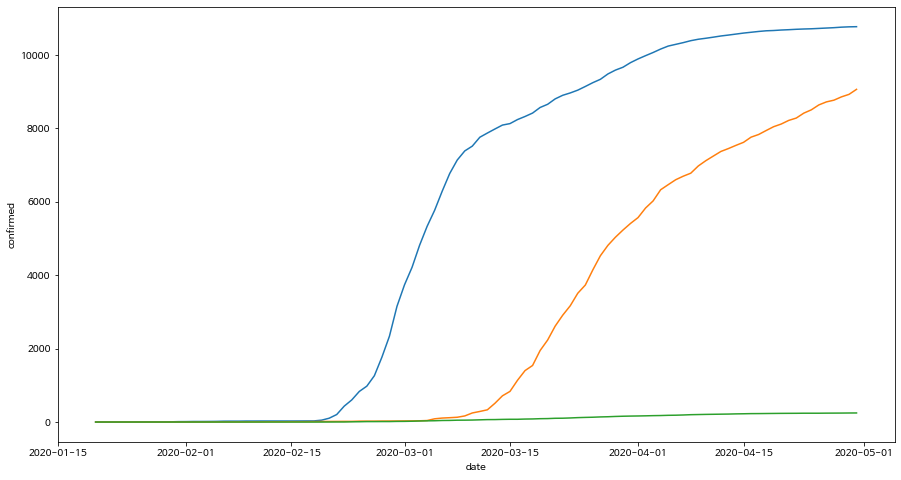

In [294]:
# 누적 확진자/퇴원자/사망자 현황 추이
plt.figure(figsize=(15,8))
time['date'] = pd.to_datetime(time['date'])
sns.lineplot(x='date', y='confirmed', data=time)
sns.lineplot(x='date', y='released', data=time)
sns.lineplot(x='date', y='deceased', data=time)
plt.show()

In [295]:
# 누적 확진자 현황을 일일 확진자 현황으로 변환
time['date'] = pd.to_datetime(time['date'])
time

def date_to_count(series):
    data=[0]
    for i in range(1,len(series)):
        data.append(series[i]-series[i-1])
    data = pd.DataFrame(data)
    return data
time['confirmed_date'] = date_to_count(time['confirmed'])
time['confirmed_date'] = date_to_count(time['confirmed'])
time

,date,time,test,negative,confirmed,released,deceased,confirmed_date
0,2020-01-20,16,1,0,1,0,0,0
1,2020-01-21,16,1,0,1,0,0,0
2,2020-01-22,16,4,3,1,0,0,0
3,2020-01-23,16,22,21,1,0,0,0
4,2020-01-24,16,27,25,2,0,0,1
...,...,...,...,...,...,...,...,...
97,2020-04-26,0,598285,578558,10728,8717,242,10
98,2020-04-27,0,601660,582027,10738,8764,243,10
99,2020-04-28,0,608514,588559,10752,8854,244,14
100,2020-04-29,0,614197,595129,10761,8922,246,9


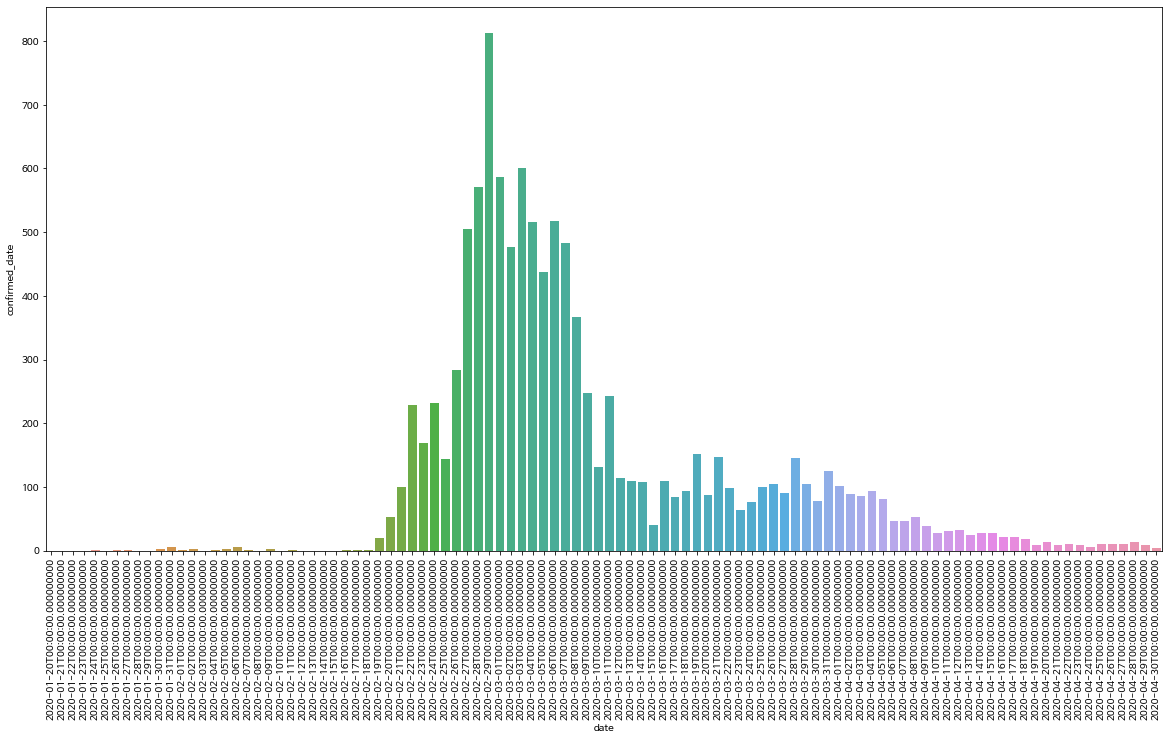

In [296]:
# 일단위 확진자 수 현황
plt.figure(figsize=(20,10))
sns.barplot(x='date', y='confirmed_date', data=time)
plt.xticks(rotation=90)
plt.show()

### 5) Time Age

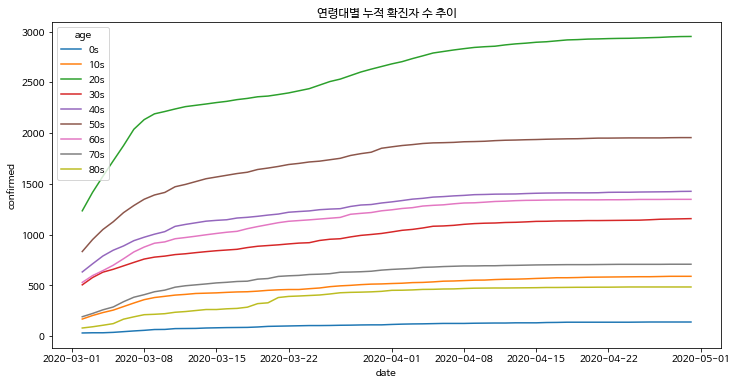

In [297]:
# 연령대별 누적 확진자 수 추이
plt.figure(figsize=(12,6))
timeage['date'] = pd.to_datetime(timeage['date'])
sns.lineplot(x='date', y='confirmed', data=timeage, hue='age')
plt.title('연령대별 누적 확진자 수 추이')
plt.show()

  - 확진자의 연령대를 살펴보면 20대가 가장 많으며 그 뒤로는 50대, 40대, 60대 순이다.
  - 사망자는 80대, 70대, 60대 순으로 나이가 많을 수록 사망자가 많은 것으로 보아 일반적인 질병과 마찬가지로 기저질환, 면역력 등과 관계가 있어 보인다.

In [298]:
# 연령대별 누적 확진자수 확인(4/30일 기준)
age_ratio = timeage[timeage['date'] == '2020-04-30']
age_ratio['fatality_rate'] = age_ratio['deceased'] / age_ratio['confirmed']
age_ratio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,time,age,confirmed,deceased,fatality_rate
531,2020-04-30,0,0s,140,0,0.000000
532,2020-04-30,0,10s,590,0,0.000000
533,2020-04-30,0,20s,2952,0,0.000000
534,2020-04-30,0,30s,1158,2,0.001727
535,2020-04-30,0,40s,1427,3,0.002102
536,2020-04-30,0,50s,1956,15,0.007669
537,2020-04-30,0,60s,1348,35,0.025964
538,2020-04-30,0,70s,709,74,0.104372
539,2020-04-30,0,80s,485,118,0.243299


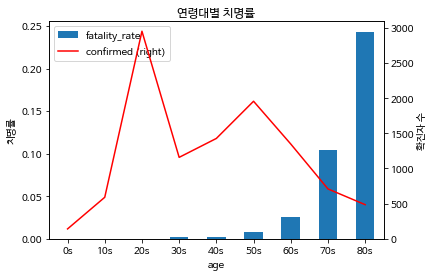

In [299]:
# 연령대별 치명률 시각화
ax = age_ratio.plot.bar(x='age', y='fatality_rate')
ax2 = age_ratio.plot(x='age', y='confirmed', color='red', secondary_y=True, ax=ax)

ax.set_ylabel('치명률')
ax2.set_ylabel('확진자 수')

plt.title('연령대별 치명률')
plt.show()

- 고령층이 절대적인 확진자 수는 적으나 치명률이 높다는 사실을 알 수 있다.

- 참고자료 : [그래프 Y축에 보조축 추가하는 법](https://www.delftstack.com/ko/howto/matplotlib/how-to-add-y-axis-label-to-secondary-y-axis-in-matplotlib/)

### 6) Time Gender

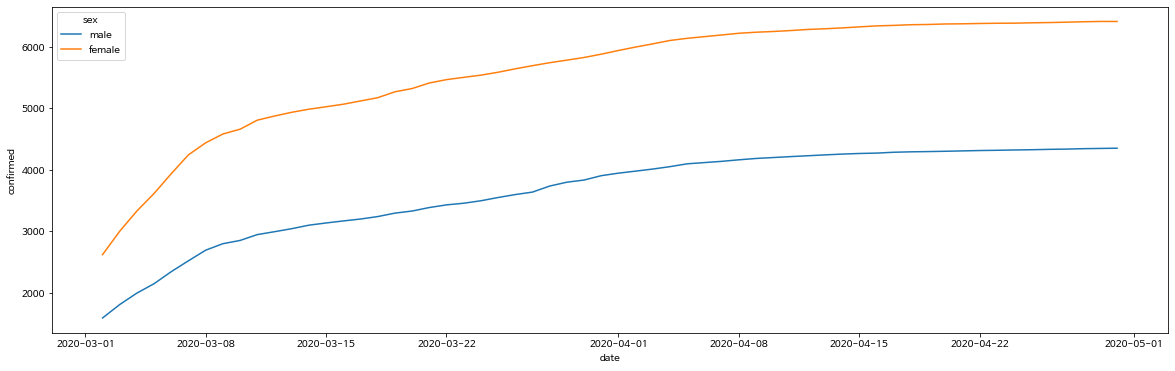

In [300]:
# 누적 확진자 데이터(성별 구분)
f,ax = plt.subplots(1,1, figsize=(20,6))
timegender['date'] = pd.to_datetime(timegender['date'])
sns.lineplot(x='date', y='confirmed', hue='sex', data=timegender)
plt.show()

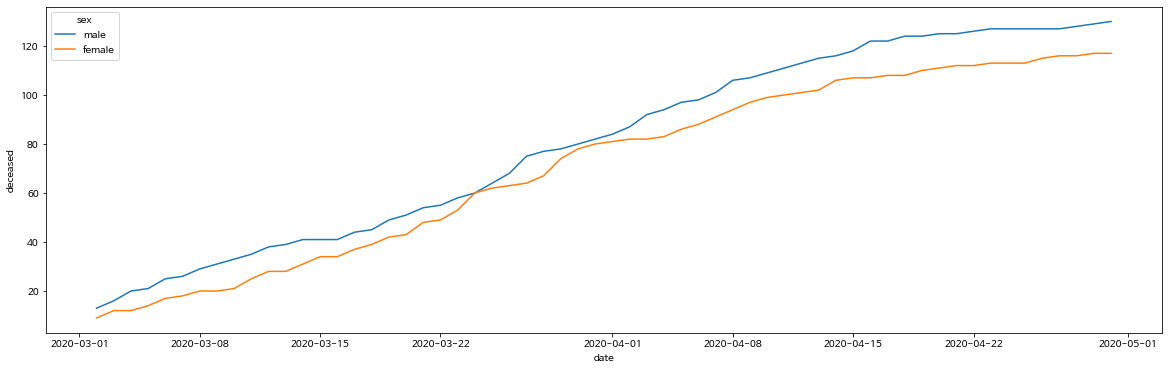

In [301]:
# 누적 사망자 데이터(성별 구분)
f,ax = plt.subplots(1,1, figsize=(20,6))
timegender['date'] = pd.to_datetime(timegender['date'])
sns.lineplot(x='date', y='deceased', hue='sex', data=timegender)
plt.show()

- 누적 확진자는 여성이 더 많은 반면에 __사망자는 남성이 더 많은 것__을 알 수 있다. 남성의 사망자가 더 많은 이유를 성별 이외에 다른 변수에서 찾아볼 필요가 있다. (확진자 중 고연령자 비중이 남자가 더 많은 경우, 흡연/비만 관련 여부)

- 참고자료 : [[데이콘] 데이터가 말하는 코로나 - 성별편](https://dacon.io/competitions/official/235590/codeshare/1012?page=2&dtype=vote)

### 7) Time Province

In [302]:
timeprovince.tail(17)

,date,time,province,confirmed,released,deceased
1717,2020-04-30,0,Seoul,633,453,2
1718,2020-04-30,0,Busan,137,116,3
1719,2020-04-30,0,Daegu,6852,6144,172
1720,2020-04-30,0,Incheon,93,68,0
1721,2020-04-30,0,Gwangju,30,27,0
1722,2020-04-30,0,Daejeon,40,35,0
1723,2020-04-30,0,Ulsan,43,37,1
1724,2020-04-30,0,Sejong,46,38,0
1725,2020-04-30,0,Gyeonggi-do,676,486,15
1726,2020-04-30,0,Gangwon-do,53,40,2


In [303]:
print('지역 개수:', timeprovince['province'].nunique())
timeprovince['province'].unique()

지역 개수: 17


array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [304]:
province_df = timeprovince[timeprovince['date'] == '2020-04-30'].sort_values(by='confirmed', ascending=False)

In [305]:
province_df 

,date,time,province,confirmed,released,deceased
1719,2020-04-30,0,Daegu,6852,6144,172
1731,2020-04-30,0,Gyeongsangbuk-do,1365,1147,52
1725,2020-04-30,0,Gyeonggi-do,676,486,15
1717,2020-04-30,0,Seoul,633,453,2
1728,2020-04-30,0,Chungcheongnam-do,143,127,0
1718,2020-04-30,0,Busan,137,116,3
1732,2020-04-30,0,Gyeongsangnam-do,117,97,0
1720,2020-04-30,0,Incheon,93,68,0
1726,2020-04-30,0,Gangwon-do,53,40,2
1724,2020-04-30,0,Sejong,46,38,0


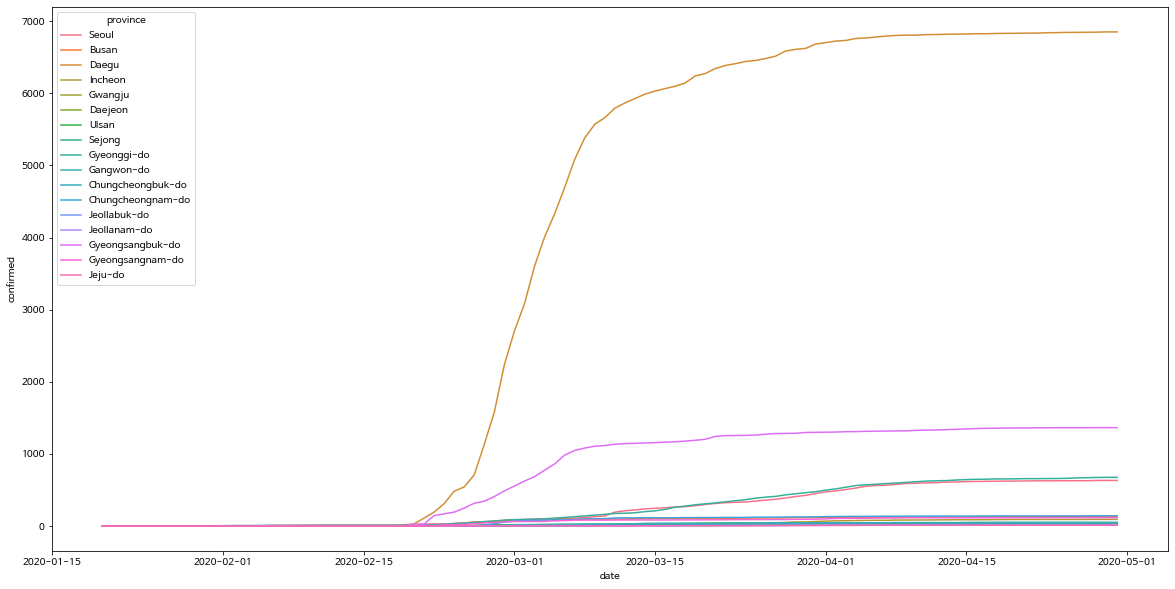

In [306]:
plt.figure(figsize=(20,10))
timeprovince['date'] = pd.to_datetime(timeprovince['date'])
sns.lineplot(x='date', y='confirmed', data=timeprovince, hue='province')

### 8) Region

In [307]:
region.groupby(['province'])['elementary_school_count', 'kindergarten_count', 'university_count', 'nursing_home_count'].sum().sort_values(by='elementary_school_count', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,elementary_school_count,kindergarten_count,university_count,nursing_home_count
province,,,,
Korea,6087,8837,340,94865
Gyeonggi-do,2554,4474,122,40982
Seoul,1214,1660,96,45478
Gyeongsangnam-do,1002,1372,42,10728
Gyeongsangbuk-do,942,1414,66,8948
Jeollanam-do,858,1084,38,6778
Jeollabuk-do,838,1038,38,7548
Chungcheongnam-do,818,998,42,7282
Gangwon-do,698,736,36,5038


In [308]:
region.groupby(['province'])['academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,academy_ratio,elderly_population_ratio,elderly_alone_ratio
province,,,
Busan,1.327647,19.357647,9.094118
Chungcheongbuk-do,1.023333,23.192500,11.825000
Chungcheongnam-do,1.122500,23.844375,11.706250
Daegu,1.713333,17.031111,7.966667
Daejeon,1.425000,14.376667,6.200000
Gangwon-do,1.116842,22.890526,11.578947
Gwangju,2.473333,14.815000,6.716667
Gyeonggi-do,1.420625,14.429688,6.084375
Gyeongsangbuk-do,0.948750,27.556250,15.133333


- 향후과제 : 'Korea' 행 삭제 후 데이터 분석

### 9) Weather

- 주어진 코로나 데이터의 기간이 4개월 정도로 표본이 적다. 적어도 사계절의 코로나 데이터가 있어야 날씨 데이터와 유의미한 분석을 할 수 있을 것 같다.

### 10) Search Trend

In [309]:
# 컬럼 -> 인덱스 전환 : pd.set_index()
index = searchtrend.set_index('date')

__감염병 관련 키워드 검색량 추이(2020년 이전 vs.이후)__

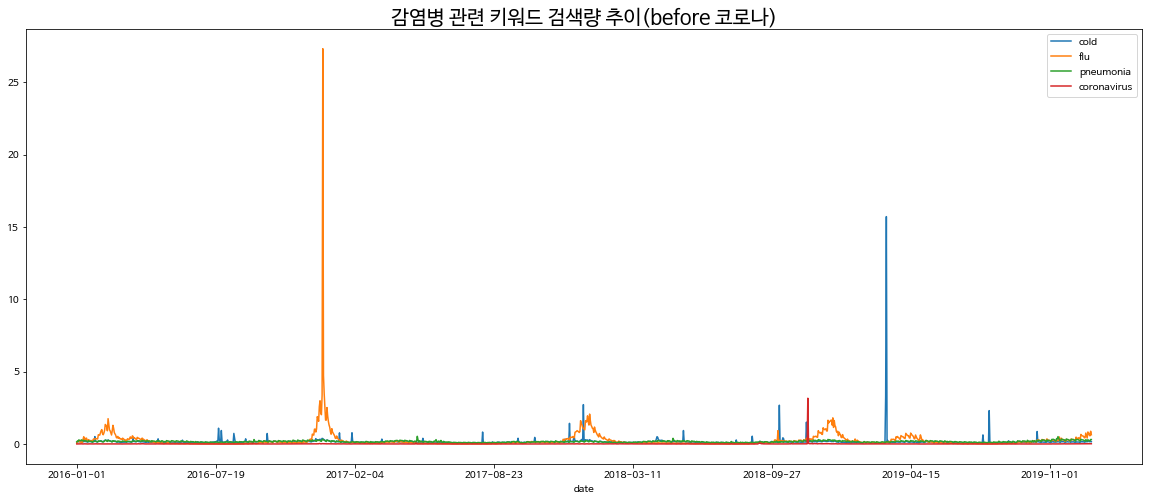

In [310]:
# 2020년 이전
searchtrend_1 = index.loc[:'2019-12-31',]
searchtrend_1 = searchtrend_1.reset_index()

f,ax = plt.subplots(1,1, figsize=(20,8))
searchtrend_1.plot(x='date', y='cold', ax=ax)
searchtrend_1.plot(x='date', y='flu', ax=ax)
searchtrend_1.plot(x='date', y='pneumonia', ax=ax)
searchtrend_1.plot(x='date', y='coronavirus', ax=ax)
plt.title('감염병 관련 키워드 검색량 추이(before 코로나)', fontsize=20)
plt.legend()

plt.show()

- 코로나 시대 이전 검색량 트렌드를 살펴보면 독감, 감기의 검색량이 대폭 증가한 시기를 확인할 수 있는데 이는 해당 감염병에 대한 유행으로 인해 일시적으로 검색량이 증가한 것이 아닌가 예상된다.

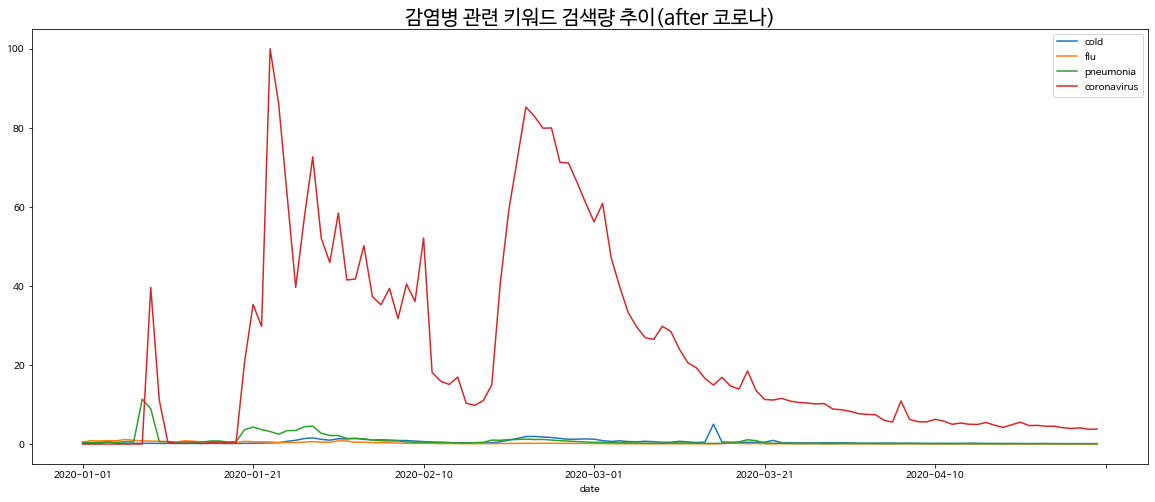

In [311]:
# 2020년 이후
searchtrend_2 = index.loc['2020-01-01':,]
searchtrend_2 = searchtrend_2.reset_index()

f,ax = plt.subplots(1,1, figsize=(20,8))
searchtrend_2.plot(x='date', y='cold', ax=ax)
searchtrend_2.plot(x='date', y='flu', ax=ax)
searchtrend_2.plot(x='date', y='pneumonia', ax=ax)
searchtrend_2.plot(x='date', y='coronavirus', ax=ax)
plt.title('감염병 관련 키워드 검색량 추이(after 코로나)', fontsize=20)
plt.legend()

plt.show()

- 최초 확진자 발생 전 중국발 우한 폐렴에 대한 뉴스가 보도 되면서 1월 중순에 처음으로 코로나 바이러스에 대한 검색량이 증가하는 모습을 볼 수 있다.  

- 그리고 최초 확진자가 발생했던 2020년 1월 20일 이후로 급격하게 코로나 검색량이 증가하다가 점차 줄어드는 모습을 보였으나, 2월 말 신천지 집단감염 시기를 기점으로 다시 검색량이 폭발하는 모습니다.

### 11) Seoul Floating

In [322]:
seoulfloating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


### 12) Policy

In [312]:
policy[policy['gov_policy'] == "Social Distancing Campaign"]

,policy_id,country,type,gov_policy,detail,start_date,end_date
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-05
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-04-06,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05


In [313]:
g = patientinfo.groupby(['confirmed_date'], as_index=False)['patient_id'].count()
g

,confirmed_date,patient_id
0,2020-01-20,1
1,2020-01-23,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,3
...,...,...
82,2020-04-25,8
83,2020-04-26,4
84,2020-04-27,7
85,2020-04-28,3


In [321]:
# 사회적 거리두기 단계 정책
g = patientinfo.groupby(['confirmed_date'], as_index=False)['patient_id'].count()
f,ax = plt.subplots(1,1, figsize=(20,6))
sns.lineplot(x='confirmed_date', y='patient_id', data=g)
plt.axvline(1.0, 0.2, 0.8, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(10.0, 0.2, 0.8, color='lightgray', linestyle='--', linewidth=2)
# plt.xticks(rotation=90)
plt.title('일자별 확진자수 현황', fontsize=20)
plt.show()

ValueError: ignored

- 그래프에서 점선으로 표시하고 있는 부분이 정부의 사회적 거리두기 캠페인 정책 시작 시점이다. (빨간색은 강도 높은 사회적 거리두기 단계, 녹샌은 비교적 완화된 사회적 거리두기 단계 정책을 시행하였다.)

- 1차 사회적 거리두기 캠페인이 __3.22일에 시작되었음에도 불구하고 2주동안 확진자가 계속 증가__해 4.6일을 기점으로 한차례 연장되어 4.19일까지 지속되었다.  

- 그래프 상에서 확인할 수 있듯이 거리두기 단계 캠페인 실시 이후 1차 연장시점(4.6일)부터 점차 확진자 수가 감소하여 __4.20일 부터는 거리두기 단계 등급을 완화__한 것으로 보인다.

- 참고자료 : [[Matplotlib] 수평선/수직선 표시하기](https://codetorial.net/matplotlib/set_lines.html)